In [ ]:
# Machine Learning with Python: Classification (complete tutorial)
Reference. By Mauro Di Pietro. [Here](https://getpocket.com/redirect?url=https%3A%2F%2Ftowardsdatascience.com%2Fmachine-learning-with-python-classification-complete-tutorial-d2c99dc524ec). [Code](https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/master/machine_learning/example_classification.ipynb)

## Content
- 1 Environment setup: import libraries and read data
- 2 Data Analysis: understand the meaning and the predictive power of the variables
- 3 Feature engineering: extract features from raw data
- 4 Preprocessing: data partitioning, handle missing values, encode categorical variables, scale
- 5 Feature Selection: keep only the most relevant variables
- 6 Model design: train, tune hyperparameters, validation, test
- 7 Performance evaluation: read the metrics
- 8 Explainability: understand how the model produces results

## 1 Environment setup

In [7]:
import warnings

# data libraries
import pandas as pd 
import numpy as np 

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# statistical tests libraries
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sum

# machine learning libraries
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# explainer libraries
from lime import lime_tabular

warnings.filterwarnings(action = 'ignore')

%matplotlib inline

In [17]:
# custom python package 
from main.utility.ml_Classification_utilities import *

In [18]:
dtf = pd.read_csv('..//..//data//kaggle-titanic-train.csv')
dtf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2 Data Analysis

Shape: (891, 11)
-----------------
Y --> Type:cat | Nas: 0(0%) | Categories: 2
Pclass --> Type:cat | Nas: 0(0%) | Categories: 3
Name --> Type:cat | Nas: 0(0%) | Categories: 891 | Possible PK
Sex --> Type:cat | Nas: 0(0%) | Categories: 2
Age --> Type:num | Nas: 177(19%) | Min-Max: 0-80
SibSp --> Type:cat | Nas: 0(0%) | Categories: 7
Parch --> Type:cat | Nas: 0(0%) | Categories: 7
Ticket --> Type:cat | Nas: 0(0%) | Categories: 681
Fare --> Type:num | Nas: 0(0%) | Min-Max: 0-512
Cabin --> Type:cat | Nas: 687(77%) | Categories: 147
Embarked --> Type:cat | Nas: 2(0%) | Categories: 3


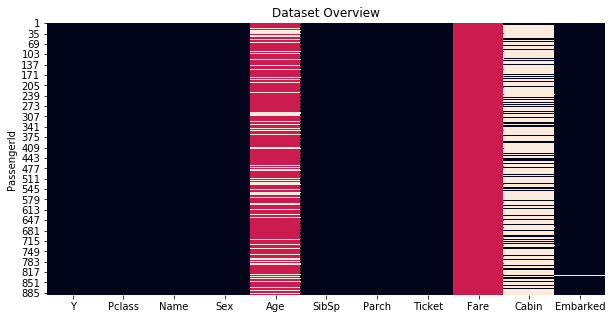

 Categerocial   Numerical   NaN 


In [28]:
dtf_overview(dtf, max_cat=20, figsize=(10, 5))
# dtf.info()

In [27]:
dtf = dtf.set_index("PassengerId")
dtf = dtf.rename(columns={"Survived": "Y"})

Group variables by info
- who: Sex, Age, Embarked (which port C=Cherbourg, Q=Queenstown, S=Southampton)
- wealth: Pclass, Ticket, Fare
- where: Cabin
- how many: SibSp (with siblings/spouse), Parch (with parent/children)

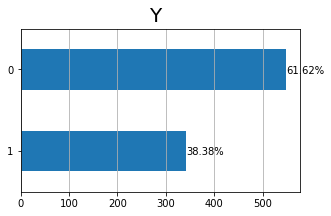

In [29]:
features = []

# target variable
# Up to 300 passengers survived and about 550 didn’t, in other words the survival rate (or the population mean) is 38%.
freqdist_plot(dtf, "Y", figsize=(5,3))